Guilherme Henrique Silva Barbara - 202120499

# **1. Modelagem**


xi​: Variável binária que representa o vértice i. 
Caso esteja em V1​ (xi ​= 1), já em V2​ (xi = ​0); 

yuv​: Variável binária que representa a aresta(u,v) cortada.
yuv assume 1 se u e v estão em subconjuntos diferentes
                        **(xu != xv)**.


                      Max ∑ yuv

                      S.a:
                        yuv ​≤ xu ​+ xv;
                        yuv ​≤ 2 − (xu ​+ xv​).
    
    Caso o grafo seja direcionado:
                    ∑​ xi ​≥ 1;
                    ∑ ​(1 − xi​) ≥ 1

**Garantindo que nenhum conjunto seja vazio**






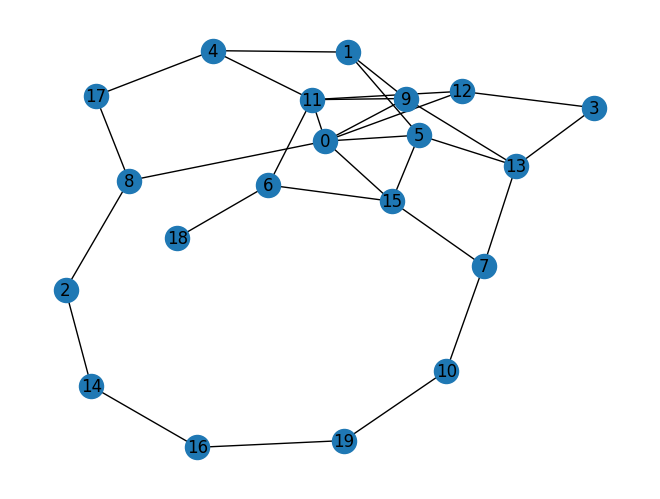

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/guilherme/miniconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/e796cc6ac3e34f00948b6b2614dbb902-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/e796cc6ac3e34f00948b6b2614dbb902-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 67 COLUMNS
At line 418 RHS
At line 481 BOUNDS
At line 532 ENDATA
Problem MODEL has 62 rows, 50 columns and 220 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 30 - 0.00 seconds
Cgl0004I processed model has 62 rows, 50 columns (50 integer (50 of which binary)) and 220 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 20 integers unsatisfied sum - 10
Cbc0038I Pass   1: suminf.   10.00000 (20) obj. -30 iterations 7
Cbc0038I Pass   2: suminf.   10.00000 (20) obj. -30 iterations 22
Cbc0

In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from pulp import LpMaximize, LpProblem, LpVariable, lpSum

# n: numero de vertices
# m: numero de arestas
def gera_grafo_nao_direcionado_conexo(n, m):
    if m < n - 1 or m > n * (n - 1) // 2:
        return None

    grafo = nx.Graph()
    vertices = list(range(n))
    grafo.add_nodes_from(vertices)
    random.shuffle(vertices)
    for i in range(n - 1):
        grafo.add_edge(vertices[i], vertices[i + 1])

    while grafo.number_of_edges() < m:
        u, v = random.sample(vertices, 2)
        if not grafo.has_edge(u, v):
            grafo.add_edge(u, v)

    return grafo

n = 20  
m = 30  
grafo = gera_grafo_nao_direcionado_conexo(n, m)


if grafo is not None:
    nx.draw(grafo, with_labels=True)
    plt.show()

   
    modelo = LpProblem(name="CorteMaixmo", sense=LpMaximize)

    x = {v: LpVariable(f"x_{v}", cat="Binary") for v in grafo.nodes()}
    y = {(u, v): LpVariable(f"y_{u}_{v}", cat="Binary") for u, v in grafo.edges()}

    #Função objetivo
    modelo += lpSum(y[u, v] for u, v in grafo.edges())

    #S.a:
    for u, v in grafo.edges():
        modelo += y[u, v] <= x[u] + x[v]
        modelo += y[u, v] <= 2 - (x[u] + x[v])

    
    modelo += lpSum(x[v] for v in grafo.nodes()) >= 1
    modelo += lpSum(1 - x[v] for v in grafo.nodes()) >= 1

    modelo.solve()

    v1 = [v for v in grafo.nodes() if x[v].value() == 1]
    v2 = [v for v in grafo.nodes() if x[v].value() == 0]
    corteMaximo = sum(1 for u, v in grafo.edges() if (x[u].value() + x[v].value() == 1))


    print("Valor do corte máximo:", corteMaximo)
    print("Conjunto V1:", v1)
    print("Conjunto V2:", v2)
else:
    print("ERro no grafo")